<a href="https://colab.research.google.com/github/AndreaMuntaner/Data-Science-I/blob/main/Proyecto_parteIII_AndreaMuntaner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1️⃣ Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# 2️⃣ Cargar dataset desde GitHub
url = "https://raw.githubusercontent.com/AndreaMuntaner/Data-Science-I/main/force2020_data_unsupervised_learning.csv"
df = pd.read_csv(url)

# Ver primeras filas
df.head()


,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342


1. DEFINICION DEL PROBLEMA : predecir litologia segun registros petrofisicos

In [4]:
# Contar valores nulos por columna
df.isnull().sum()


,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,4238
PEF,1830
DTC,81
Litologia,0


In [5]:
df[['RHOB', 'NPHI', 'PEF', 'DTC']].describe()


,RHOB,NPHI,PEF,DTC
count,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,0.404547,3.463851,125.106178
std,0.297725,0.133532,2.561239,30.618337
min,1.404576,0.024330,1.010027,55.726753
25%,1.963399,0.315346,2.320836,90.883087
50%,2.055079,0.448527,2.790249,141.300461
75%,2.381963,0.506343,4.267342,148.048355
max,2.927888,0.800262,66.030319,175.953140


El porcentaje de nulos es el siguiente:
**NPHI** → 4.238 nulos (≈ 23 %)

PEF → 1.830 nulos (≈ 10 %)

DTC → 81 nulos (menos del 1 %)
Las otras variables (RHOB, GR, DEPTH_MD, Litologia) no tienen nulos.   Dado que el neutron es una medida directa de la roca, no seria correcto asumir el valor de mediana, por lo que en este caso se decide eliminar los nulos.

In [6]:
# 🔹 Elimino las filas que tengan nulos en las variables medidas directamente
df = df.dropna(subset=['NPHI', 'PEF', 'DTC'])

# Verifico que no queden nulos
df.isnull().sum()


,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,0
PEF,0
DTC,0
Litologia,0


**2.-DEFINIR LAS VARIABLES X E Y (FEATURE SELECTION) PARA ENTRENAR EL MODELO **

elegí todas las variables (RHOB, NPHI, DTC, PEF Y PROF) , porque son medidas directas de registros de pozos y estan directamente relacionados con la composicion de la roca. Estas cinco variables proporcionan una descripción física completa de las propiedades de la roca, por lo que resultan adecuadas para que el modelo identifique patrones y relacione los valores medidos con el tipo de litología.

In [3]:

# Cree una nueva columna "Litologia"
# Si GR < 75 = 1 (limpio), si GR >= 75 = 0 (arcilloso)
df['Litologia'] = np.where(df['GR'] < 75, 1, 0)

# Vemos cuántos registros hay de cada tipo
df['Litologia'].value_counts()


,count
Litologia,
1,11854
0,6416


In [7]:
# Selección de características (features)
X = df[['RHOB', 'NPHI', 'PEF', 'DTC', 'DEPTH_MD']]

# Variable objetivo (target)
y = df['Litologia']

# Verificar forma y consistencia (para ver que todo coincida)
print("Shape X:", X.shape)
print("Shape y:", y.shape)

X.head()


Shape X: (12202, 5)
Shape y: (12202,)


,RHOB,NPHI,PEF,DTC,DEPTH_MD
4238,1.774626,0.765867,1.631495,147.837677,1138.704
4239,1.800986,0.800262,1.645080,142.382431,1138.856
4240,1.817696,0.765957,1.645873,138.258331,1139.008
4241,1.829333,0.702521,1.620216,139.198914,1139.160
4242,1.813854,0.639708,1.504854,144.290085,1139.312


**3.- ENTRENAMIENTO DEL MODELO:** Separo datos en entrenamiento y prueba para que el modelo aprenda con una parte de los datos (train) y luego se evalúe con datos nuevos (test).

In [8]:
from sklearn.model_selection import train_test_split

# Dividir los datos: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verifico los tamaños
print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)


Tamaño entrenamiento: (9761, 5)
Tamaño prueba: (2441, 5)


.-ENTRENAR EL MODELO : Mi variable objetivo, que es litologia, tiene 2 clases (0 y 1), es decir clasificacion binaria , por lo tanto voy a usar un modelo de regresion logistica

In [9]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo
modelo = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = modelo.predict(X_test)


**4.- EVALUACION DEL MODELO **(Calculé varias metricas para entender qu etan bien clasifica las litologias)

Exactitud (Accuracy): 0.738

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.69      0.20      0.31       717
           1       0.74      0.96      0.84      1724

    accuracy                           0.74      2441
   macro avg       0.71      0.58      0.57      2441
weighted avg       0.73      0.74      0.68      2441



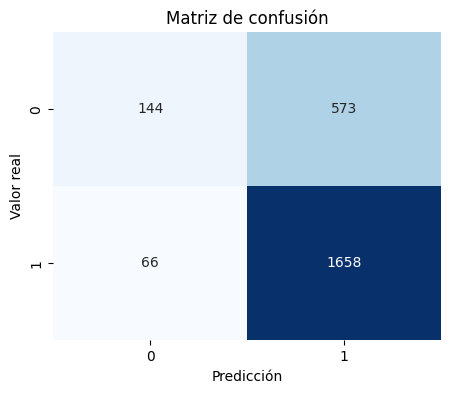

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud (Accuracy): {accuracy:.3f}")

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de confusión")
plt.show()


**5.- CONCLUSIONES**

El modelo de regresión logística logró una exactitud del 74 %, mostrando un buen desempeño general para predecir el tipo de litología a partir de los registros petrofísicos.

Sin embargo, el análisis de la matriz indica que la clase “arcillosa” (0) es subrepresentada y el modelo tiende a clasificarla erróneamente como “limpia” (1).

Esto sugiere un desequilibrio de clases en el dataset, que podría corregirse en una siguiente iteración mediante técnicas de balanceo o modelos más complejos (p. ej. Random Forest o XGBoost).

Aun así, los resultados iniciales son coherentes con la tendencia esperada: la relación entre densidad (RHOB) y porosidad (NPHI) es una de las más influyentes para distinguir litologías, confirmando el comportamiento observado en el análisis exploratorio previo.



In [ ]:
OPCION B: modelo mas robusto

Exactitud (Accuracy) del Random Forest: 0.946

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       717
           1       0.95      0.97      0.96      1724

    accuracy                           0.95      2441
   macro avg       0.94      0.93      0.93      2441
weighted avg       0.95      0.95      0.95      2441



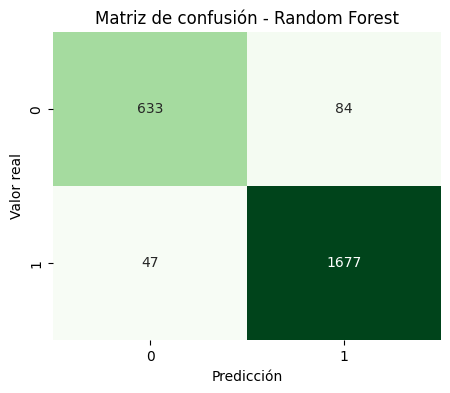

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cree el modelo
modelo_rf = RandomForestClassifier(
    n_estimators=200,       # número de árboles (cuantos más, mejor precisión pero más lento)
    random_state=42,
    class_weight='balanced' # ajusta el peso de cada clase para compensar el desbalance (más 1 que 0)
)

# Entrene el modelo
modelo_rf.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = modelo_rf.predict(X_test)

# Evaluar el rendimiento
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Exactitud (Accuracy) del Random Forest: {accuracy_rf:.3f}")

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))

# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de confusión - Random Forest")
plt.show()


Un modelo mas robusto mejora notablemente la prediccion de 0 (zona arcillosa), acertando el 95% de las veces la litologia.